In [20]:
import numpy as np 
import pandas as pd 
import seaborn as sns   
import matplotlib.pyplot as plt

In [14]:
sns.set(style="whitegrid", palette="Blues_d")  
plt.rcParams['axes.facecolor'] = 'white'

In [3]:
df = pd.read_csv("advertising.csv")

In [4]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [5]:
df.isna().sum()

Daily Time Spent on Site    0
Age                         0
Area Income                 0
Daily Internet Usage        0
Ad Topic Line               0
City                        0
Male                        0
Country                     0
Timestamp                   0
Clicked on Ad               0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


# **EDA**

# Daily Time Spent on Site

In [23]:
from tabulate import tabulate

# Calculate descriptive statistics
clicked_desc = df[df['Clicked on Ad'] == 1]['Daily Time Spent on Site'].describe()
not_clicked_desc = df[df['Clicked on Ad'] == 0]['Daily Time Spent on Site'].describe()

# Create a DataFrame for better visualization
comparison_df = pd.DataFrame({
    'Metric': ['Count', 'Mean', 'Std. Dev', 'Min', '25%', '50%', '75%', 'Max'],
    'Clicked on Ad': clicked_desc.values,
    'Did Not Click on Ad': not_clicked_desc.values
})

# Display the table
print(tabulate(comparison_df, headers='keys', tablefmt='fancy_grid'))

╒════╤══════════╤═════════════════╤═══════════════════════╕
│    │ Metric   │   Clicked on Ad │   Did Not Click on Ad │
╞════╪══════════╪═════════════════╪═══════════════════════╡
│  0 │ Count    │        500      │             500       │
├────┼──────────┼─────────────────┼───────────────────────┤
│  1 │ Mean     │         53.1458 │              76.8546  │
├────┼──────────┼─────────────────┼───────────────────────┤
│  2 │ Std. Dev │         12.8221 │               7.56003 │
├────┼──────────┼─────────────────┼───────────────────────┤
│  3 │ Min      │         32.6    │              48.22    │
├────┼──────────┼─────────────────┼───────────────────────┤
│  4 │ 25%      │         42.8375 │              72.0775  │
├────┼──────────┼─────────────────┼───────────────────────┤
│  5 │ 50%      │         51.53   │              77.65    │
├────┼──────────┼─────────────────┼───────────────────────┤
│  6 │ 75%      │         62.075  │              82.07    │
├────┼──────────┼─────────────────┼─────

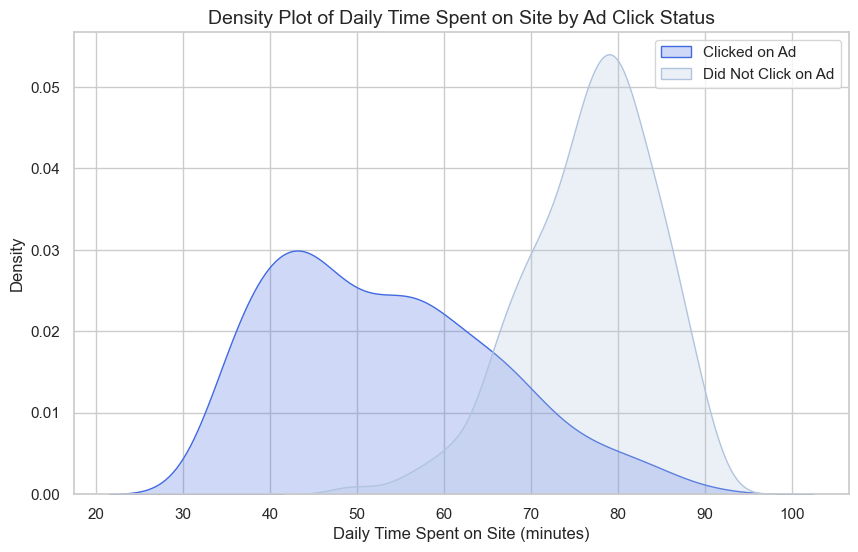

In [16]:
#Density Plot of Daily Time Spent on Site by Ad Click Status

plt.figure(figsize=(10, 6))
# KDE plot for users who clicked on the ad
sns.kdeplot(df[df['Clicked on Ad'] == 1]['Daily Time Spent on Site'], label="Clicked on Ad", fill=True, color='royalblue')
# KDE plot for users who did not click on the ad
sns.kdeplot(df[df['Clicked on Ad'] == 0]['Daily Time Spent on Site'], label="Did Not Click on Ad", fill=True, color='lightsteelblue')

# Add labels and title
plt.title('Density Plot of Daily Time Spent on Site by Ad Click Status', fontsize=14)
plt.xlabel('Daily Time Spent on Site (minutes)', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.legend()
plt.show()


C:\Users\ARYAN\AppData\Local\Temp\ipykernel_20396\314867399.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Clicked on Ad', y='Daily Time Spent on Site', data=df, palette='Blues')


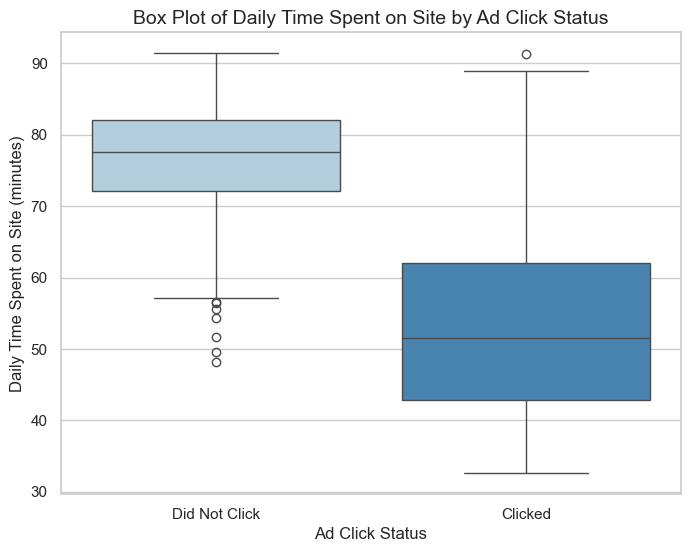

In [19]:
plt.figure(figsize=(8, 6))
# Box plot to compare time spent on site between users who clicked and those who didn't
sns.boxplot(x='Clicked on Ad', y='Daily Time Spent on Site', data=df, palette='Blues')

# Add title and labels
plt.title('Box Plot of Daily Time Spent on Site by Ad Click Status', fontsize=14)
plt.xlabel('Ad Click Status', fontsize=12)
plt.ylabel('Daily Time Spent on Site (minutes)', fontsize=12)

# Customize the x-axis tick labels
plt.xticks([0, 1], ['Did Not Click', 'Clicked'])
plt.show()


### Key Findings:

The analysis revealed a clear distinction between users who clicked on ads and those who did not based on the time they spent on the website:

- **Users who clicked on ads** spent an average of **53.15 minutes** on the site, while those who did not click spent significantly more time, averaging **76.85 minutes**.
- This difference suggests that users who engage with ads tend to find the content relevant early in their session, leading to quicker interactions and reduced browsing time.

#### Business Implications:
- **Ad Placement Strategy**: Ads should be placed strategically during the **initial minutes** of user sessions to capitalize on quick engagement.
- **Targeted Content**: Focus on delivering highly relevant ads for users who exhibit goal-oriented behavior and are more likely to interact early.

# Age Group

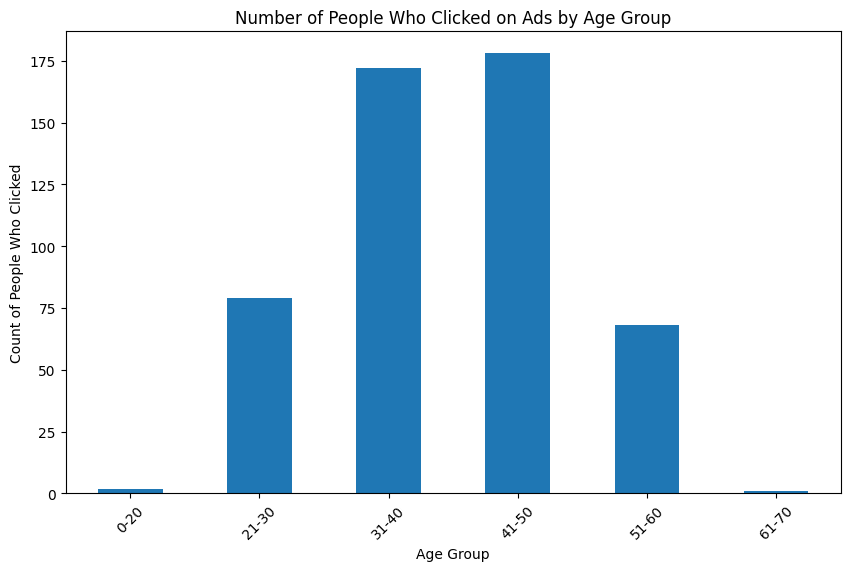

In [10]:
df['Age Group'] = pd.cut(df['Age'], 
                               bins=[0, 20, 30, 40, 50, 60, 70], 
                               labels=['0-20', '21-30', '31-40', '41-50', '51-60', '61-70'])
clicked_data = df[df['Clicked on Ad'] == 1]
# Count the number of people who clicked on ads within each age group
clicked_counts = clicked_data['Age Group'].value_counts().sort_index()

# Plot the count in a bar chart
plt.figure(figsize=(10, 6))
clicked_counts.plot(kind='bar')
plt.title('Number of People Who Clicked on Ads by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count of People Who Clicked')
plt.xticks(rotation=45)
plt.show()

# Area Income

In [26]:
# Calculate descriptive statistics
clicked_desc = df[df['Clicked on Ad'] == 1]['Area Income'].describe()
not_clicked_desc = df[df['Clicked on Ad'] == 0]['Area Income'].describe()

# Create a DataFrame for better visualization
comparison_df = pd.DataFrame({
    'Metric': ['Count', 'Mean', 'Std. Dev', 'Min', '25%', '50%', '75%', 'Max'],
    'Clicked on Ad': clicked_desc.values,
    'Did Not Click on Ad': not_clicked_desc.values
})

# Display the table
print(tabulate(comparison_df, headers='keys', tablefmt='fancy_grid'))


╒════╤══════════╤═════════════════╤═══════════════════════╕
│    │ Metric   │   Clicked on Ad │   Did Not Click on Ad │
╞════╪══════════╪═════════════════╪═══════════════════════╡
│  0 │ Count    │           500   │                500    │
├────┼──────────┼─────────────────┼───────────────────────┤
│  1 │ Mean     │         48614.4 │              61385.6  │
├────┼──────────┼─────────────────┼───────────────────────┤
│  2 │ Std. Dev │         14116.2 │               8904.06 │
├────┼──────────┼─────────────────┼───────────────────────┤
│  3 │ Min      │         13996.5 │              33239.2  │
├────┼──────────┼─────────────────┼───────────────────────┤
│  4 │ 25%      │         39106.6 │              55606.7  │
├────┼──────────┼─────────────────┼───────────────────────┤
│  5 │ 50%      │         49417.3 │              62275.4  │
├────┼──────────┼─────────────────┼───────────────────────┤
│  6 │ 75%      │         59241   │              67518.8  │
├────┼──────────┼─────────────────┼─────

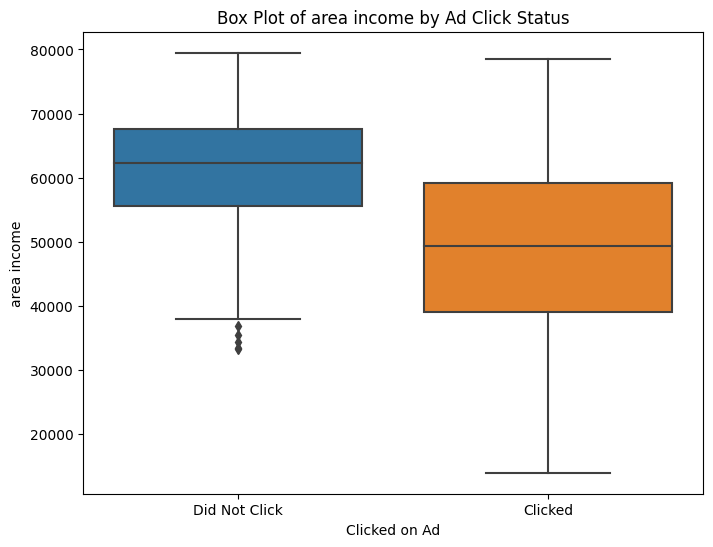

In [12]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Clicked on Ad', y='Area Income', data=df)
plt.title('Box Plot of area income by Ad Click Status')
plt.xlabel('Clicked on Ad')
plt.ylabel('area income')
plt.xticks([0, 1], ['Did Not Click', 'Clicked'])
plt.show()


### Key Findings: Area Income and Ad Click Behavior

- **Users who clicked on ads** had an average area income of **$48,614**, while users who did not click on ads had a higher average income of **$61,385**.
- Interestingly, users with lower area incomes were more likely to engage with ads, contrary to the assumption that higher-income users would have greater purchasing power and ad engagement.

#### Business Implications:
1. **Ad Targeting and Content**: Ads targeting **lower-income users** may benefit from highlighting discounts, deals, and affordable product offerings. This group is more responsive to ads that meet their financial considerations.
2. **Tailoring Ad Strategy**: For higher-income users, ads may need to shift focus to **premium products** or different marketing channels, as this group may be less responsive to typical ad placements.



# Internet Usage

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


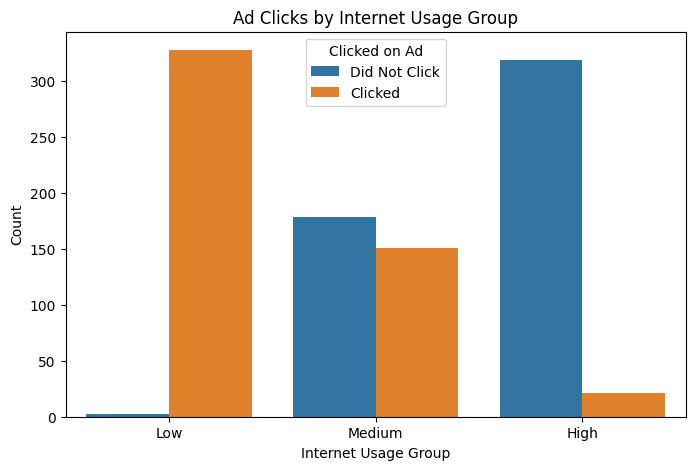

In [13]:
bins = [0, df['Daily Internet Usage'].quantile(0.33), df['Daily Internet Usage'].quantile(0.66), df['Daily Internet Usage'].max()]
labels = ['Low', 'Medium', 'High']
df['Internet Usage Group'] = pd.cut(df['Daily Internet Usage'], bins=bins, labels=labels, include_lowest=True)

# Plot the distribution of users who clicked on ads across internet usage groups
plt.figure(figsize=(8, 5))
sns.countplot(x='Internet Usage Group', hue='Clicked on Ad', data=df)
plt.title('Ad Clicks by Internet Usage Group')
plt.xlabel('Internet Usage Group')
plt.ylabel('Count')
plt.legend(title='Clicked on Ad', labels=['Did Not Click', 'Clicked'])
plt.show()


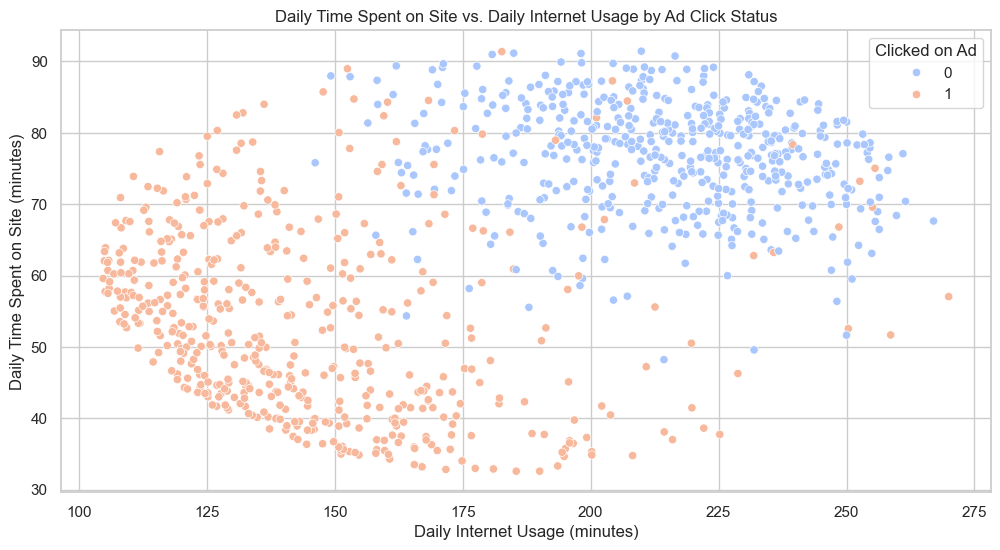

In [34]:
#Daily Time Spent on Site vs. Daily Internet Usage
 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot to visualize the relationship
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Daily Internet Usage', y='Daily Time Spent on Site', hue='Clicked on Ad', data=df, palette='coolwarm')
plt.title('Daily Time Spent on Site vs. Daily Internet Usage by Ad Click Status')
plt.xlabel('Daily Internet Usage (minutes)')
plt.ylabel('Daily Time Spent on Site (minutes)')
#plt.legend(title='Clicked on Ad', labels=['Did Not Click', 'Clicked'])
plt.show()



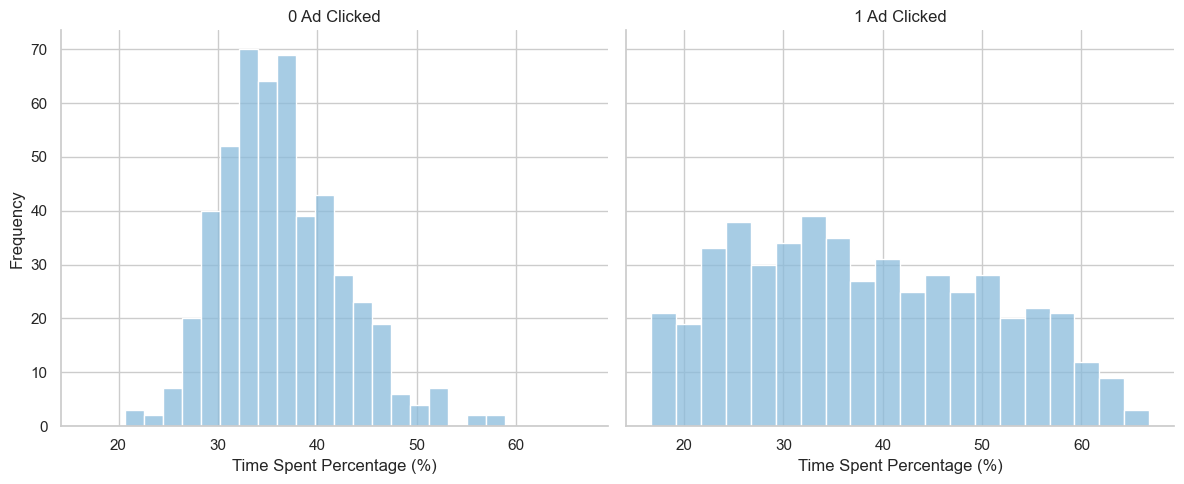

In [35]:
# Create a new column for percentage of time spent on site out of total internet usage
df['Time Spent Percentage'] = (df['Daily Time Spent on Site'] / df['Daily Internet Usage']) * 100

# differences between ad clickers and non-clickers in terms of the percentage of daily time out of total internet usage
# spent on the site
g = sns.FacetGrid(df, col='Clicked on Ad', height=5, aspect=1.2)
g.map(sns.histplot, 'Time Spent Percentage', bins=20)
g.set_titles(col_template='{col_name} Ad Clicked')
g.set_axis_labels('Time Spent Percentage (%)', 'Frequency')
plt.show()

In [36]:
# Create a new column for percentage of time spent on site out of total internet usage
df['Time Spent Percentage'] = (df['Daily Time Spent on Site'] / df['Daily Internet Usage']) * 100

# Calculate the number of users who spend more than 50% of their internet usage on the site
clickers_over_50 = df[(df['Clicked on Ad'] == 1) & (df['Time Spent Percentage'] > 50)].shape[0]
non_clickers_over_50 = df[(df['Clicked on Ad'] == 0) & (df['Time Spent Percentage'] > 50)].shape[0]

print(f"Number of clickers spending more than 50%: {clickers_over_50}")
print(f"Number of non-clickers spending more than 50%: {non_clickers_over_50}")

Number of clickers spending more than 50%: 104
Number of non-clickers spending more than 50%: 14


# Gender distribution

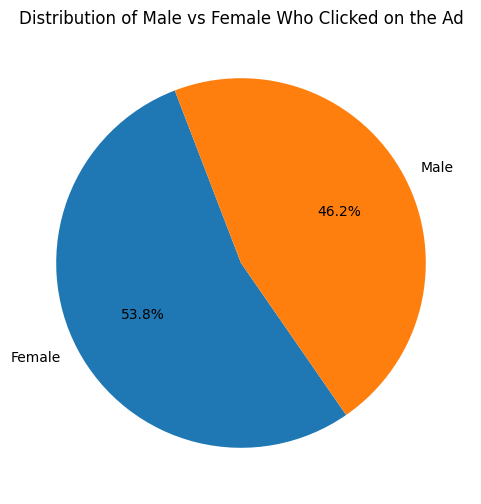

In [15]:
clicked_df = df[df['Clicked on Ad'] == 1]
gender_counts = clicked_df['Male'].value_counts()
labels = ['Female', 'Male']
percentages = (gender_counts / gender_counts.sum()) * 100

plt.figure(figsize=(6, 6))
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=111)
plt.title('Distribution of Male vs Female Who Clicked on the Ad')
plt.show()

# Top 10 Countries

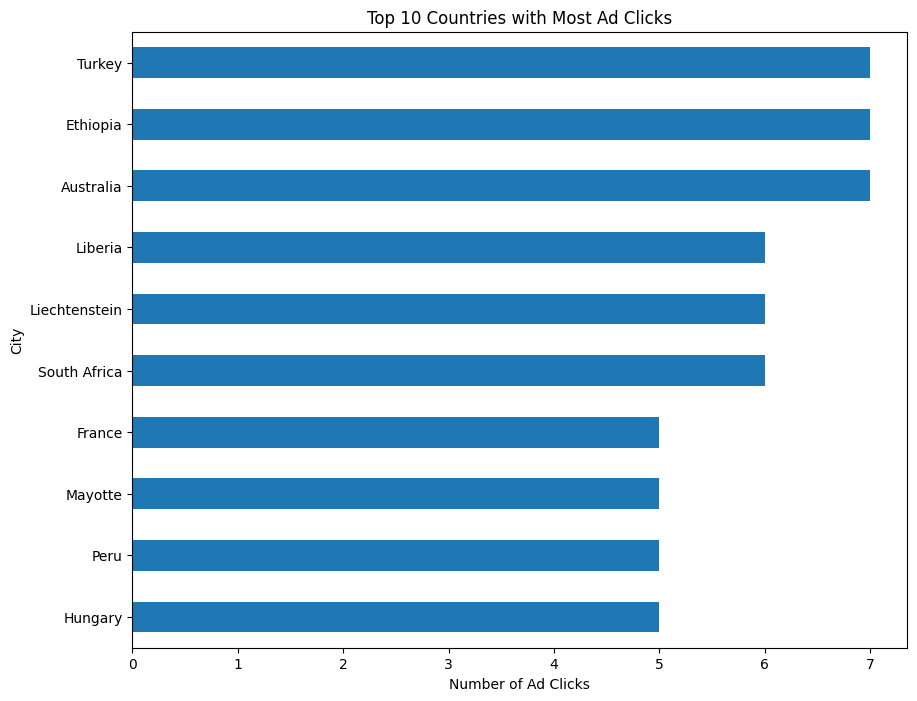

In [16]:
top_cities = clicked_df['Country'].value_counts().head(10)

# Plot horizontal bar chart for top 10 cities
plt.figure(figsize=(10, 8))
top_cities.sort_values().plot(kind='barh')
plt.title('Top 10 Countries with Most Ad Clicks')
plt.xlabel('Number of Ad Clicks')
plt.ylabel('City')
plt.show()

# Timestamp Analysis

In [17]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

df['Month'] = df['Timestamp'].dt.month
df['DayOfWeek'] = df['Timestamp'].dt.day_name()
df['Hour'] = df['Timestamp'].dt.hour

clicked_ads = df[df['Clicked on Ad'] == 1]

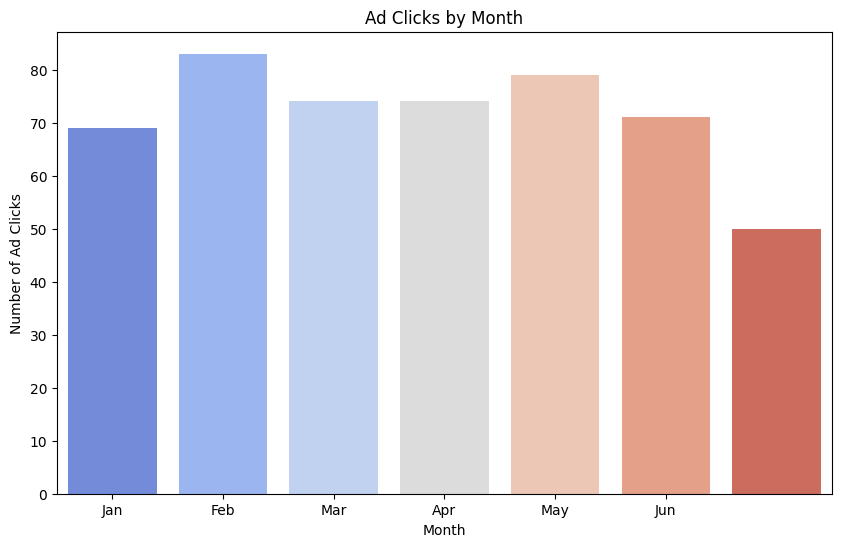

In [18]:
##Ad Clicks by Month
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=clicked_ads, palette='coolwarm')
plt.title('Ad Clicks by Month')
plt.xlabel('Month')
plt.ylabel('Number of Ad Clicks')
plt.xticks(ticks=range(0, 6), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'])
plt.show()


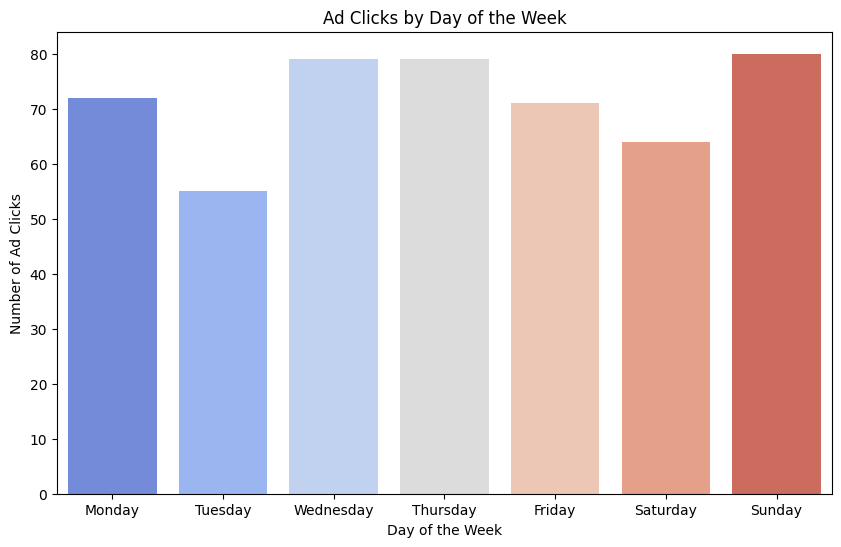

In [19]:
plt.figure(figsize=(10, 6))
sns.countplot(x='DayOfWeek', data=clicked_ads, palette='coolwarm', order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.title('Ad Clicks by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Ad Clicks')
plt.show()

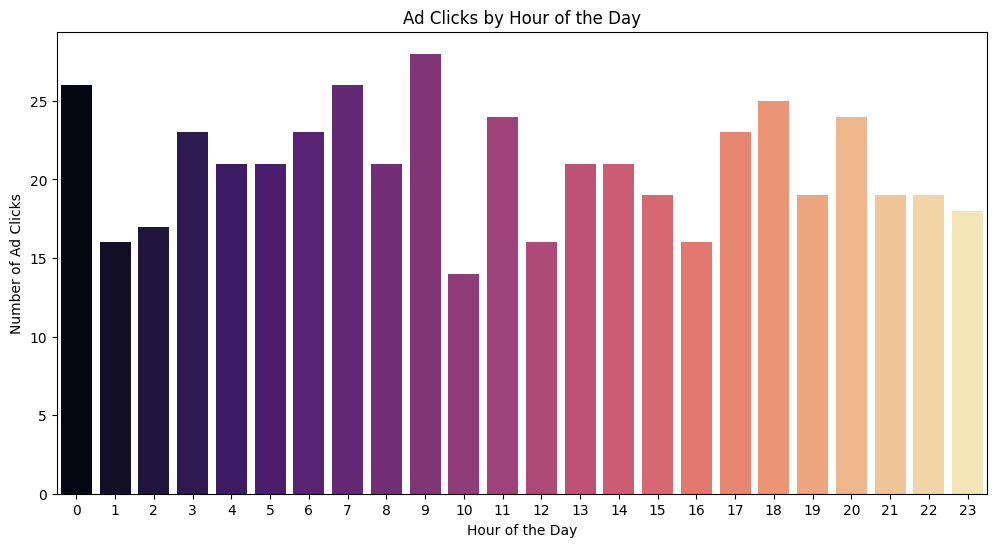

In [20]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Hour', data=clicked_ads, palette='magma')
plt.title('Ad Clicks by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Ad Clicks')
plt.xticks(ticks=range(0, 24))
plt.show()

# **Cluster Analysis**

Why perform clusetr analysis?

* **Identifying User Segments**: Cluster analysis will group users into segments based on similarities in their features, such as demographics (age, income), online behavior (daily time spent on site, internet usage), and interaction with ads (whether they clicked on ads). This segmentation can reveal patterns that might not be apparent from a broader analysis.
 
* **Tailoring Marketing Strategies**: By understanding the characteristics of each user segment, you can tailor marketing strategies to better match the interests and behaviors of those segments. For example, if a cluster is identified as high-income, frequent internet users who rarely click on ads, a different approach or type of ad content might be more effective for engaging these users.

* **Improving Ad Targeting**: Insights from cluster analysis can improve ad targeting by identifying which user segments are more likely to engage with specific types of ads, leading to higher click-through rates and better campaign performance.

* **Product and Content Development**: Understanding user segments can also inform product development and content creation, ensuring that offerings are more closely aligned with the needs and preferences of different segments.

In [37]:
# feature selection
features = df[['Age', 'Area Income', 'Daily Internet Usage', 'Daily Time Spent on Site']]

In [38]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

c:\Users\ARYAN\anaconda3\envs\mlproj\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ARYAN\anaconda3\envs\mlproj\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ARYAN\anaconda3\envs\mlproj\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\ARYAN\anaconda3\envs\mlproj\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will c

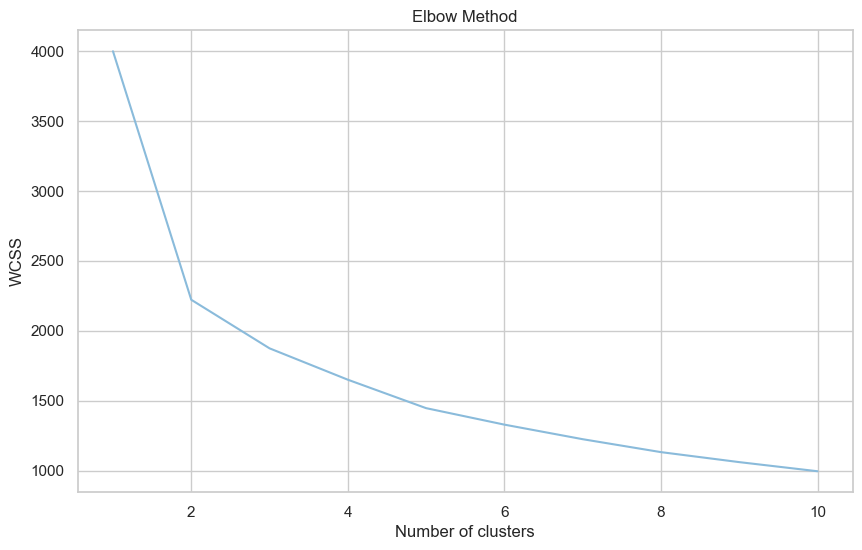

In [39]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [46]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(features_scaled)

df['Cluster'] = clusters

c:\Users\ARYAN\anaconda3\envs\mlproj\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [47]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
cluster_summary = df.groupby('Cluster')[numeric_cols].mean()

In [48]:
cluster_summary.iloc[:,0:6]

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
Cluster,,,,,,
0,53.192136,41.703883,34981.798786,143.684709,0.436893,0.995146
1,76.530756,31.432892,60823.546219,213.134537,0.497164,0.071834
2,51.161698,40.716981,58936.202189,142.086340,0.483019,0.969811


How This Clusters Can Help

* **Ad Placement and Content Customization**: Understanding that Cluster 0 and Cluster 2 are more likely to click on ads, but for possibly different reasons, can help tailor the content and placement of ads. For example, Cluster 0, with lower income, might respond better to ads for more affordable products or discount offers.

* **User Engagement Strategies**: Knowing that Cluster 1 spends a lot of time online and on the site without clicking ads suggests potential for better engagement strategies or reevaluating the ad relevance for this group.

* **Demographic Targeting**: The clusters show distinct age and income profiles, which can be used to target ads based on demographic factors. For instance, different product categories might be advertised to the younger Cluster 1 vs. the older Clusters 0 and 2.

* **Behavioral Insights**: The high internet usage of Cluster 1 might indicate they are tech-savvy users who are good at avoiding ads or use ad blockers. This suggests exploring alternative marketing strategies for this segment.


# Clusters In Depth

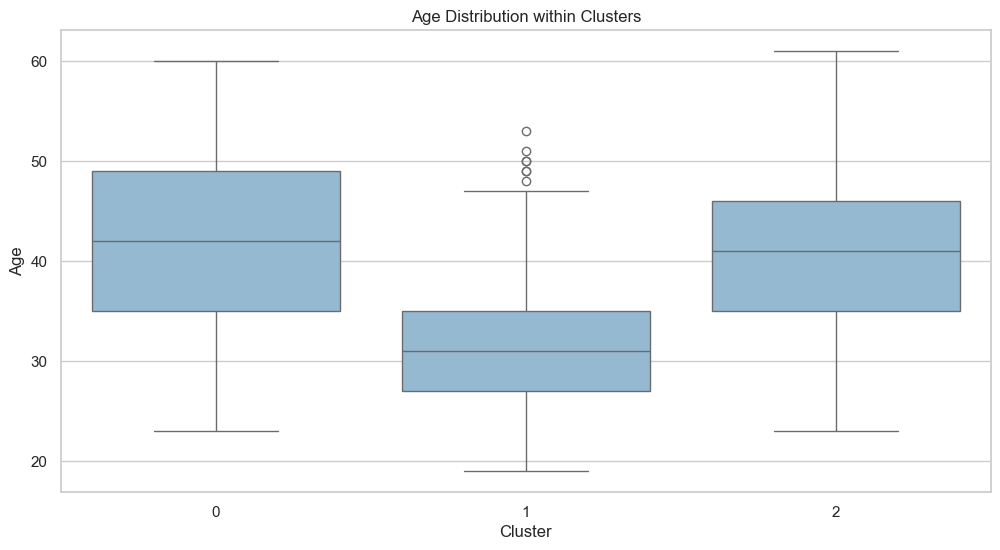

In [50]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Age', data=df)
plt.title('Age Distribution within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Age')
plt.show()

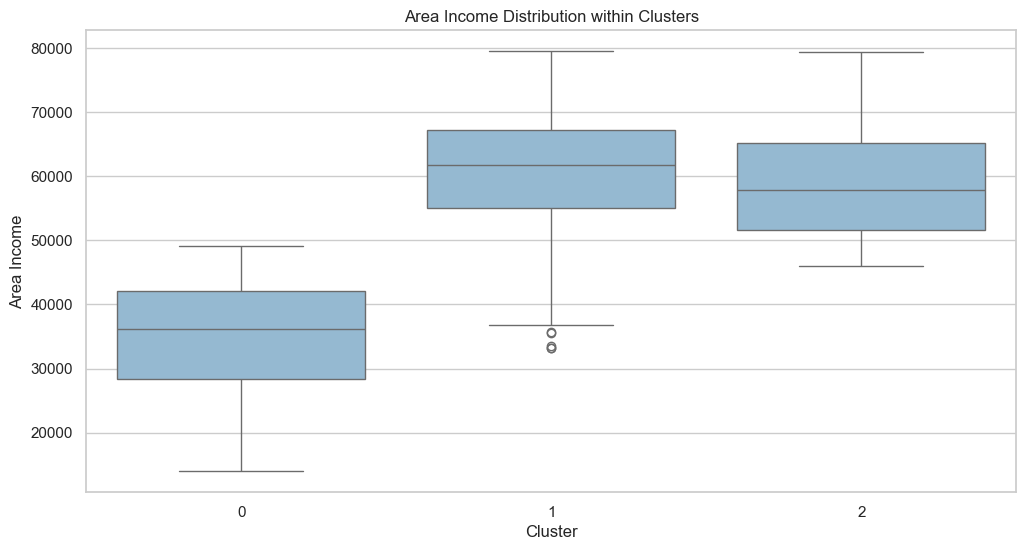

In [51]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='Area Income', data=df)
plt.title('Area Income Distribution within Clusters')
plt.xlabel('Cluster')
plt.ylabel('Area Income')
plt.show()

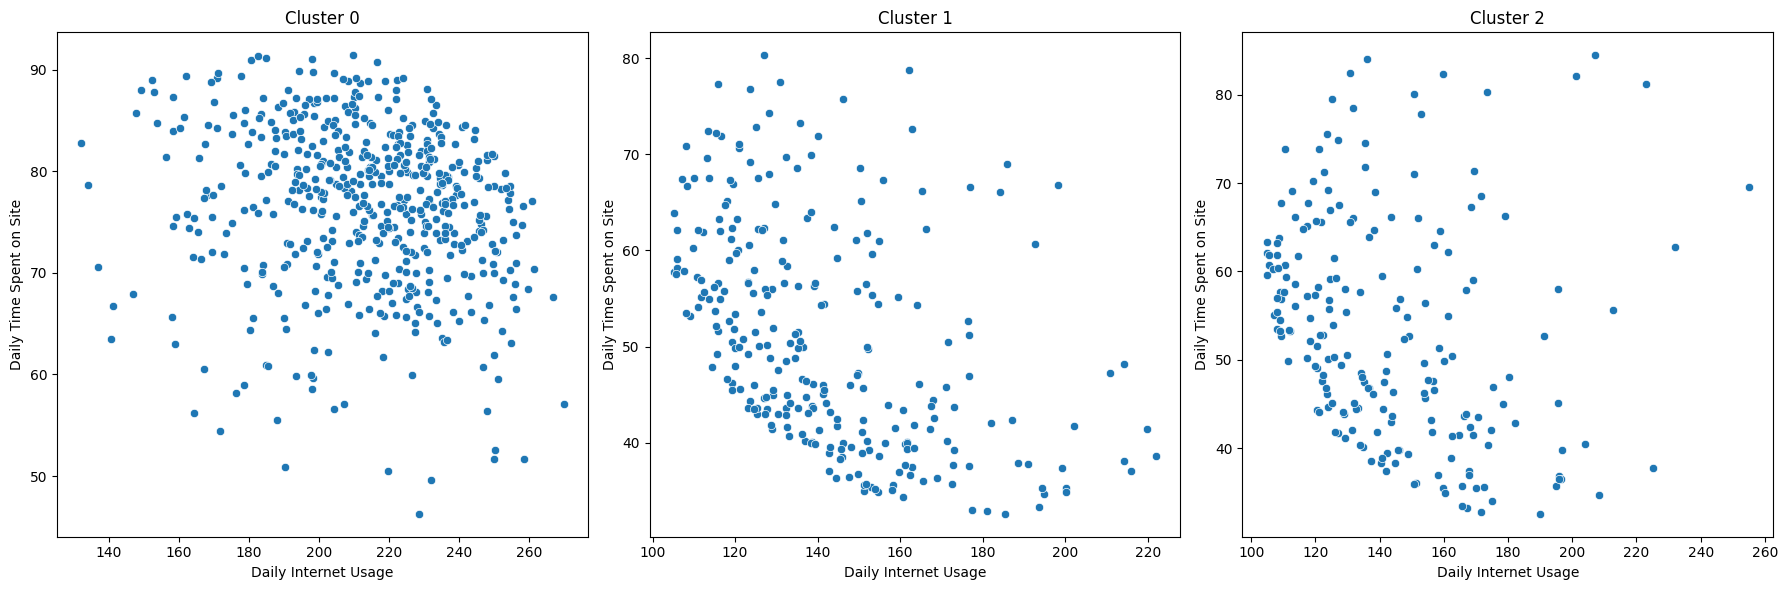

In [29]:
plt.figure(figsize=(18, 6))

for i in df['Cluster'].unique():
    # Create a scatter plot for each cluster
    plt.subplot(1, 3, i+1)  
    cluster_data = df[df['Cluster'] == i]
    sns.scatterplot(x='Daily Internet Usage', y='Daily Time Spent on Site', data=cluster_data)
    plt.title(f'Cluster {i}')
    plt.xlabel('Daily Internet Usage')
    plt.ylabel('Daily Time Spent on Site')

plt.tight_layout()
plt.show()

# **Conclusion**

Throughout this project, we conducted an extensive exploratory data analysis (EDA) on an advertising dataset with the aim of understanding the factors that influence users' likelihood to click on online ads. Our analysis covered various facets of user behavior and demographics, including daily time spent on the site, age distribution, area income, internet usage, gender distribution, and engagement patterns across time.

Our key findings include:

* User Engagement: Users who clicked on ads spent less time on the site and had lower area income on average, suggesting that ads might be effectively targeted at users who are likely to make quicker decisions and are seeking economical options.
* Demographics: Age and income distributions within ad-click clusters indicated distinct demographic segments with unique ad interaction patterns, highlighting opportunities for demographic-specific ad targeting.
* Internet Usage: Segmentation based on daily internet usage revealed that high internet users were not necessarily the most engaged with ads, suggesting a potential for optimizing ad content and placement for different levels of internet activity.
* Temporal Patterns: The timestamp analysis offered insights into when users are most likely to click on ads, which could inform the timing of ad campaigns for improved effectiveness.


Through cluster analysis, we discovered three distinct user groups, each with unique characteristics that can inform tailored advertising approaches:

* Cluster 0, characterized by high internet usage but low ad-click rates, suggesting the need for more engaging or relevant ad content.
* Cluster 1, showing moderate internet usage with the highest ad-click rates, indicating high potential value for targeted campaigns.
* Cluster 2, similar to Cluster 1 in behavior but with the lowest area income, suggesting sensitivity to economic factors.


Implications and Recommendations:

* Tailored Content: Develop ad content that aligns with the distinct preferences and behaviors identified within each cluster.
* Strategic Timing: Schedule ad campaigns to coincide with peak engagement times revealed by the timestamp analysis.
* Economic Targeting: Consider the economic profiles of each cluster when choosing products and messaging for ads.